In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from pylab import *


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import cross_val_score


In [2]:
data = pd.read_excel(r'C:\Users\Sangee\Downloads\IT Support Hackathon\SampleInput.xlsx', sheet_name=0)
data.head(3)

,TicketNumber,Client,Staff,Source,Title,Resolution,HelpTopic,DataOn,DueDate,ClosedDate,ModifiedDate,KYC
0,T955496,User,ITSupport,Email,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,12/17/15 12:00 PM,NaN,12/17/15 01:02 PM,12/17/15 12:59 PM,YY
1,IT413956,User,ITSupport,Email,Need a LAN Cable,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,NaN,15-12-2017 13:13,14-12-2017 12:42,N
2,IT413444,User,ITSupport,Email,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,14-12-2017 12:06,NaN,15-12-2017 13:13,14-12-2017 13:44,N


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 12 columns):
TicketNumber    398 non-null object
Client          398 non-null object
Staff           398 non-null object
Source          398 non-null object
Title           273 non-null object
Resolution      398 non-null object
HelpTopic       398 non-null object
DataOn          398 non-null object
DueDate         0 non-null float64
ClosedDate      398 non-null object
ModifiedDate    398 non-null object
KYC             394 non-null object
dtypes: float64(1), object(11)
memory usage: 37.4+ KB


In [4]:
col = ['Title', 'Resolution', 'HelpTopic']
data = data[col]
data[data['HelpTopic']=='Access Requests']

,Title,Resolution,HelpTopic
6,NaN,We have reset the password and communicated to...,Access Requests
7,Status Changed,Status changed from Open to Closed by Vinod Ku...,Access Requests
8,Create new account and share the username and ...,"Go to URL : accountsetup.com, Enter personal d...",Access Requests
9,USB Enabling,"As you requested, we have enabled USB access o...",Access Requests
18,Request to create login credentials for Mr. Koti,We have already created account and details ha...,Access Requests
19,Request to create login credentials for Dr. Hasan,Account created and details sent to user's per...,Access Requests
20,FW: Myspace Login Issue-- Ania,"Go to URL : password.reset.com, Enter you logi...",Access Requests
21,Login credetials are not working.,"Go to URL : password.reset.com, Enter you logi...",Access Requests
32,Not able to proceed further in ticket.abc.com ...,Resolved. Please check the same now.,Access Requests
33,New Account is needed for a new joinee.,"Go to URL : accountsetup.com, Enter personal d...",Access Requests


In [5]:
data['category_id'] = data['HelpTopic'].factorize()[0]

In [6]:
data.head(3)

,Title,Resolution,HelpTopic,category_id
0,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,0
1,Need a LAN Cable,Please come to IT desk and collect.,Accessories,1
2,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,1


In [7]:
category_id_df = data[['HelpTopic', 'category_id']].drop_duplicates().sort_values('category_id')
category_to_id = dict(category_id_df.values)
id_to_category = dict(category_id_df[['category_id', 'HelpTopic']].values)
data.head()

,Title,Resolution,HelpTopic,category_id
0,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,0
1,Need a LAN Cable,Please come to IT desk and collect.,Accessories,1
2,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,1
3,Need a mouse,hello Raj Ganpur<br /><br />please come to It ...,Accessories,1
4,Mouse replacement is needed.,hello Raj Ganpur<br /><br />we are replaced th...,Accessories,1


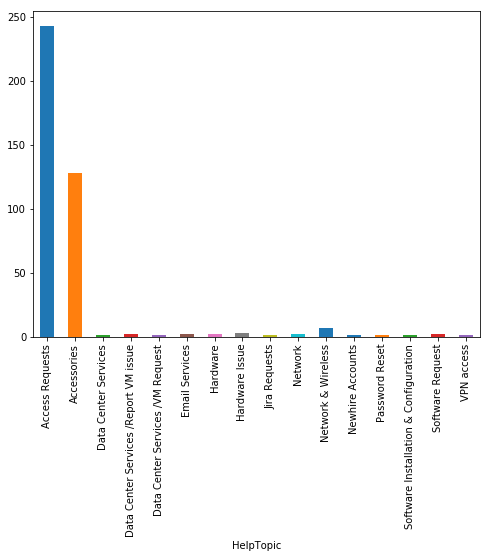

In [8]:
fig = plt.figure(figsize=(8,6))
data.groupby('HelpTopic').Resolution.count().plot.bar(ylim=0)
plt.show()

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.Title.values.astype('U')).toarray()
labels = data.category_id
features.shape

(398, 168)

In [10]:
N = 2
for Title, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Title))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Access Requests':
  . Most correlated unigrams:
. laptop
. need
  . Most correlated bigrams:
. new collaborator
. wifi access
# 'Accessories':
  . Most correlated unigrams:
. overdue
. mouse
  . Most correlated bigrams:
. marked overdue
. ticket marked
# 'Data Center Services':
  . Most correlated unigrams:
. nan
. project
  . Most correlated bigrams:
. marked overdue
. status changed
# 'Data Center Services /Report VM issue':
  . Most correlated unigrams:
. server
. got
  . Most correlated bigrams:
. marked overdue
. status changed
# 'Data Center Services /VM Request':
  . Most correlated unigrams:
. project
. vm
  . Most correlated bigrams:
. marked overdue
. status changed
# 'Email Services':
  . Most correlated unigrams:
. outlook
. configure
  . Most correlated bigrams:
. ticket marked
. status changed
# 'Hardware':
  . Most correlated unigrams:
. screen
. blue
  . Most correlated bigrams:
. screen startup
. blue screen
# 'Hardware Issue':
  . Most correlated unigrams:
. laptop

In [11]:
X_train, X_test, y_train, y_test = train_test_split(data['Title'], data['HelpTopic'], random_state = 0)
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train.values.astype('U'))
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
clf = MultinomialNB().fit(X_train_tfidf, y_train)

In [12]:
print(clf.predict(count_vect.transform(["How can I Delete Internet Cookies"])))

['Access Requests']


In [13]:
data[data['Title'] == "How can I Delete Internet Cookies"]

,Title,Resolution,HelpTopic,category_id


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:605: Warning: The least populated class in y has only 1 members, which is too few. The mi

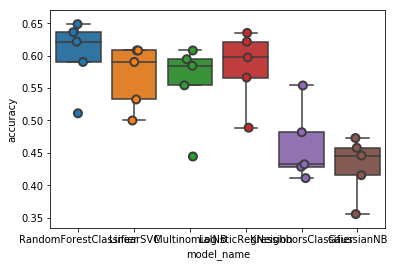

In [14]:
models = [
    RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
    LinearSVC(),
    MultinomialNB(),
    LogisticRegression(random_state=0),
    KNeighborsClassifier(n_neighbors=3),
    GaussianNB()]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
  for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [15]:
cv_df.groupby('model_name').accuracy.mean().sort_values(ascending = False)

model_name
RandomForestClassifier    0.601621
LogisticRegression        0.581863
LinearSVC                 0.567809
MultinomialNB             0.557156
KNeighborsClassifier      0.461619
GaussianNB                0.429578
Name: accuracy, dtype: float64

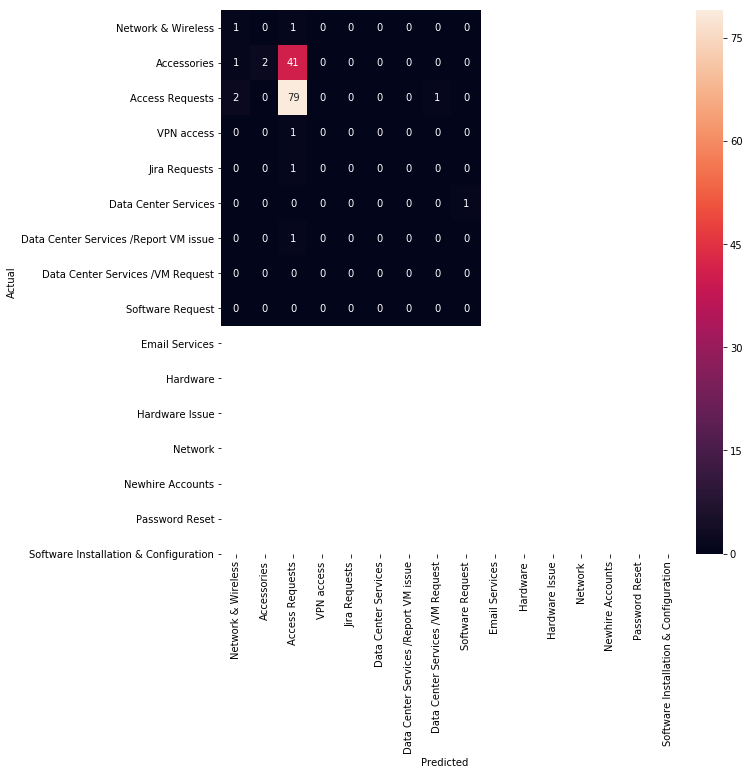

In [21]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, data.index, test_size=0.33, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=category_id_df.HelpTopic.values, yticklabels=category_id_df.HelpTopic.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
category_id_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16 entries, 0 to 394
Data columns (total 2 columns):
HelpTopic      16 non-null object
category_id    16 non-null int64
dtypes: int64(1), object(1)
memory usage: 384.0+ bytes


In [43]:
def str_join(df, sep, *cols):
    from functools import reduce
    return reduce(lambda x, y: x.astype(str).str.cat(y.astype(str), sep=sep), [data[col] for col in cols])

data['title_resolution'] = str_join(data, ' ', 'Title', 'Resolution')

In [91]:
data['title_resolution'].astype(str)

0      Need Ethernet access Please connect the LAN ca...
1      Need a LAN Cable Please come to IT desk and co...
2      Need a laptop Conector. Please come to IT desk...
3      Need a mouse hello Raj Ganpur<br /><br />pleas...
4      Mouse replacement is needed. hello Raj Ganpur<...
5      Status Changed Status changed from Open to Clo...
6      nan We have reset the password and communicate...
7      Status Changed Status changed from Open to Clo...
8      Create new account and share the username and ...
9      USB Enabling As you requested, we have enabled...
10     Collaborators added by end user Naga Appana &l...
11            nan <div> <p class=MsoNormal"><span>Hi Sam
12     nan <div> <p class=MsoNormal">Thanks for the u...
13     Ticket Marked Overdue Ticket flagged as overdu...
14     Ticket Assigned to Nagaraju Mochi Please do ne...
15     Ticket Assigned to Hari Neelam could you pleas...
16     nan Hi Valli<br /><br />We have arranged the l...
17                nan Sent the 

In [84]:
data.head(15)

,Title,Resolution,HelpTopic,category_id,title_resolution
0,Need Ethernet access,Please connect the LAN cable to the red port o...,Network & Wireless,0,Need Ethernet access Please connect the LAN ca...
1,Need a LAN Cable,Please come to IT desk and collect.,Accessories,1,Need a LAN Cable Please come to IT desk and co...
2,Need a laptop Conector.,Please come to IT desk and collect.,Accessories,1,Need a laptop Conector. Please come to IT desk...
3,Need a mouse,hello Raj Ganpur<br /><br />please come to It ...,Accessories,1,Need a mouse hello Raj Ganpur<br /><br />pleas...
4,Mouse replacement is needed.,hello Raj Ganpur<br /><br />we are replaced th...,Accessories,1,Mouse replacement is needed. hello Raj Ganpur<...
5,Status Changed,Status changed from Open to Closed by Kumara S...,Accessories,1,Status Changed Status changed from Open to Clo...
6,NaN,We have reset the password and communicated to...,Access Requests,2,nan We have reset the password and communicate...
7,Status Changed,Status changed from Open to Closed by Vinod Ku...,Access Requests,2,Status Changed Status changed from Open to Clo...
8,Create new account and share the username and ...,"Go to URL : accountsetup.com, Enter personal d...",Access Requests,2,Create new account and share the username and ...
9,USB Enabling,"As you requested, we have enabled USB access o...",Access Requests,2,"USB Enabling As you requested, we have enabled..."


In [85]:
tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(data.title_resolution).toarray()
labels = data.category_id
features.shape

(398, 290)

In [86]:
N = 2
for Title, category_id in sorted(category_to_id.items()):
  features_chi2 = chi2(features, labels == category_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(Title))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))

# 'Access Requests':
  . Most correlated unigrams:
. battery
. procurement
  . Most correlated bigrams:
. reset password
. updated updated
# 'Accessories':
  . Most correlated unigrams:
. collect
. procurement
  . Most correlated bigrams:
. class msonormal
. ticket updated
# 'Data Center Services':
  . Most correlated unigrams:
. team
. project
  . Most correlated bigrams:
. status changed
. br br
# 'Data Center Services /Report VM issue':
  . Most correlated unigrams:
. server
. got
  . Most correlated bigrams:
. status changed
. br br
# 'Data Center Services /VM Request':
  . Most correlated unigrams:
. project
. separate
  . Most correlated bigrams:
. br br
. separate mail
# 'Email Services':
  . Most correlated unigrams:
. click
. https
  . Most correlated bigrams:
. abc com
. ticket abc
# 'Hardware':
  . Most correlated unigrams:
. machine
. choose
  . Most correlated bigrams:
. status changed
. br br
# 'Hardware Issue':
  . Most correlated unigrams:
. working
. support
  . Most c

0      Need Ethernet access Please connect the LAN ca...
1      Need a LAN Cable Please come to IT desk and co...
2      Need a laptop Conector. Please come to IT desk...
3      Need a mouse hello Raj Ganpur<br /><br />pleas...
4      Mouse replacement is needed. hello Raj Ganpur<...
5      Status Changed Status changed from Open to Clo...
6      nan We have reset the password and communicate...
7      Status Changed Status changed from Open to Clo...
8      Create new account and share the username and ...
9      USB Enabling As you requested, we have enabled...
10     Collaborators added by end user Naga Appana &l...
11            nan <div> <p class=MsoNormal"><span>Hi Sam
12     nan <div> <p class=MsoNormal">Thanks for the u...
13     Ticket Marked Overdue Ticket flagged as overdu...
14     Ticket Assigned to Nagaraju Mochi Please do ne...
15     Ticket Assigned to Hari Neelam could you pleas...
16     nan Hi Valli<br /><br />We have arranged the l...
17                nan Sent the 